The purpose of this Jupyter notebook is to visualize the distribution of nearest distances from bike stations to Boston’s public transit stops by transit type. The figure generated here correspond to the left side of Figure 1.

First we import the Python libraries that we need.

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Read in Boston's bikeshare data.

In [2]:
df_bike = pd.read_csv('../Data/boston_summer_bike_station_data.csv')
print('Number of unique census tracts:', df_bike['census_tract'].nunique())
print('Number of unique bikeshare stations:', df_bike['station_name'].nunique())

Number of unique census tracts: 113
Number of unique bikeshare stations: 190


Get metrics involved in average bike share ridership.

In [3]:
print('Median of average bikeshare ridership:', df_bike['average_ridership'].quantile(0.5))
print('Mean of average bikeshare ridership:', df_bike['average_ridership'].mean())
print('Stdev of average bikeshare ridership:', df_bike['average_ridership'].std())
print('Max of average bikeshare ridership:', df_bike['average_ridership'].max())
print('Min of average bikeshare ridership:', df_bike['average_ridership'].min())

Median of average bikeshare ridership: 60.57070707
Mean of average bikeshare ridership: 72.87543859695789
Stdev of average bikeshare ridership: 64.40146755180038
Max of average bikeshare ridership: 359.4545455
Min of average bikeshare ridership: 2.676767677


Plot histograms of distance to nearest public transit stops.

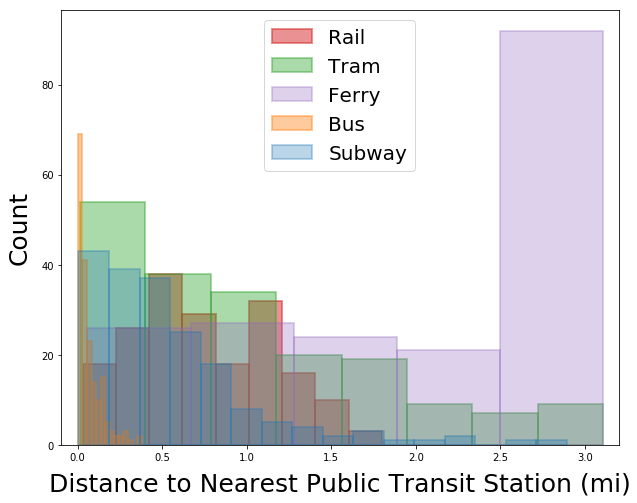

In [4]:
# for everything distance greater than 5, set as 5
transits = ['rail_dist', 'bus_dist', 'tram_dist', 'ferry_dist', 'subway_dist']
for i, transit in enumerate(transits):
    df_bike[transit+'2'] = df_bike[transit]
    for index, row in df_bike.iterrows():
        if row[transit] > 5:
             df_bike.loc[index, transit+'2'] = 5
                
plt.figure(figsize=(10, 8))
plt.xlim((-0.1, 3.2))
# transits = ['rail_dist', 'bus_dist', 'tram_dist', 'ferry_dist', 'subway_dist']
transits = ['rail_dist2', 'tram_dist2', 'ferry_dist2', 'bus_dist2', 'subway_dist2']
color_dict = {'rail_dist':'C3', 'bus_dist':'C1', 'tram_dist':'C2', 'ferry_dist':'C4', 'subway_dist':'C0'}
opacity_dict = {'rail_dist':0.5, 'bus_dist':0.4, 'tram_dist':0.4, 'ferry_dist':0.3, 'subway_dist':0.3}
labels = ['Rail', 'Tram', 'Ferry', 'Bus', 'Subway']
for i, transit in enumerate(transits):
    sns.distplot(df_bike[transit].values*0.621371, hist = True, kde = False, color = color_dict[transit[:-1]],
                 hist_kws = {'edgecolor': color_dict[transit[:-1]], 'linewidth': 2, 'alpha':opacity_dict[transit[:-1]]},
                 label = labels[i])

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.xlabel('Distance to Nearest Public Transit Station (mi)', fontsize=25, labelpad=10)
plt.ylabel('Count', fontsize=25, labelpad=10)
plt.legend(loc='best', fontsize=20)
plt.show()